In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv("data/matches.csv")
deliveries = pd.read_csv("data/deliveries.csv")

In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
deliveries.shape

(260920, 17)

## Feature Engineering

In [6]:
# Feature 1: Ball number in the innings (0.1 = over 0, ball 1 → becomes 1)
deliveries['ball_number'] = deliveries['over'] * 6 + deliveries['ball']

# Feature 2: Dot ball indicator
deliveries['is_dot_ball'] = deliveries['total_runs'].apply(lambda x: 1 if x == 0 else 0)

# Feature 3: Boundary indicator
deliveries['is_boundary'] = deliveries['batsman_runs'].apply(lambda x: 1 if x in [4, 6] else 0)

# Feature 4: Six and four indicators
deliveries['is_six'] = deliveries['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
deliveries['is_four'] = deliveries['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)

# Feature 5: Wicket indicator
deliveries['is_wicket'] = deliveries['dismissal_kind'].notna().astype(int)

# Feature 6: Over.ball format for readability (e.g., 15.2)
deliveries['over_ball'] = deliveries['over'].astype(str) + '.' + deliveries['ball'].astype(str)

# Feature 7: Join match-level info (e.g., date, venue)
deliveries = deliveries.merge(matches[['id', 'season', 'date', 'venue']], left_on='match_id', right_on='id', how='left')

# Drop redundant 'id' column from merge
deliveries.drop('id', axis=1, inplace=True)

# View enhanced dataframe
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,fielder,ball_number,is_dot_ball,is_boundary,is_six,is_four,over_ball,season,date,venue
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,NaN,1,0,0,0,0,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,2,1,0,0,0,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,3,0,0,0,0,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,4,1,0,0,0,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,5,1,0,0,0,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium


In [7]:
total_score = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score = total_score[total_score['inning']==1]

In [9]:
total_score

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


## Data Visualtion

C:\Users\DELL-7373\AppData\Local\Temp\ipykernel_11432\691847804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batters.values, y=top_batters.index, palette='plasma')


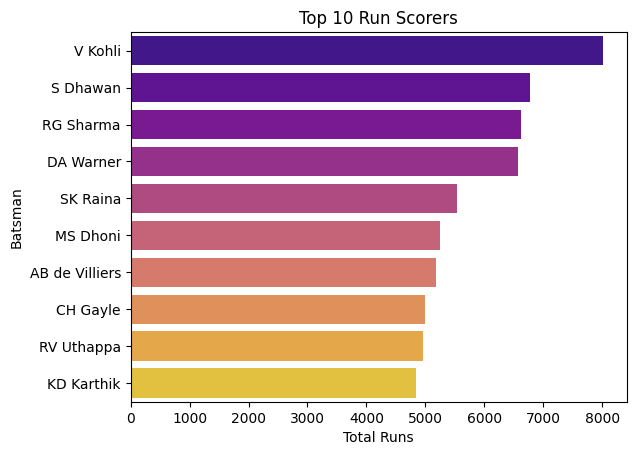

In [10]:
# 1. 🔝 Top 10 run scorers
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_batters.values, y=top_batters.index, palette='plasma')
plt.title("Top 10 Run Scorers")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()

C:\Users\DELL-7373\AppData\Local\Temp\ipykernel_11432\3416148247.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='coolwarm')


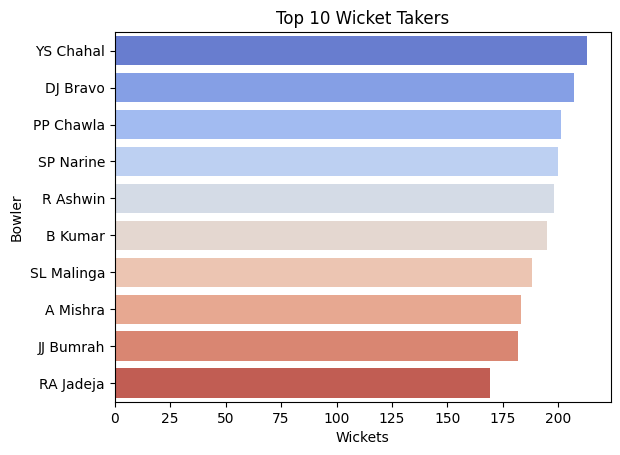

In [11]:
# 2. 🎯 Top 10 wicket-takers
wickets = deliveries[deliveries['is_wicket'] == 1]
top_bowlers = wickets.groupby('bowler').size().sort_values(ascending=False).head(10)
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='coolwarm')
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()

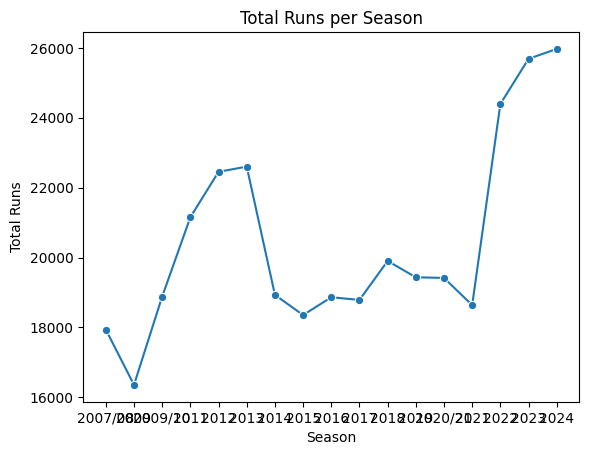

In [12]:
# 3. 📈 Runs per season
season_runs = deliveries.groupby('season')['total_runs'].sum()
sns.lineplot(x=season_runs.index, y=season_runs.values, marker='o')
plt.title("Total Runs per Season")
plt.ylabel("Total Runs")
plt.xlabel("Season")
plt.show()

C:\Users\DELL-7373\AppData\Local\Temp\ipykernel_11432\3963615407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wickets.values, y=team_wickets.index, palette='viridis')


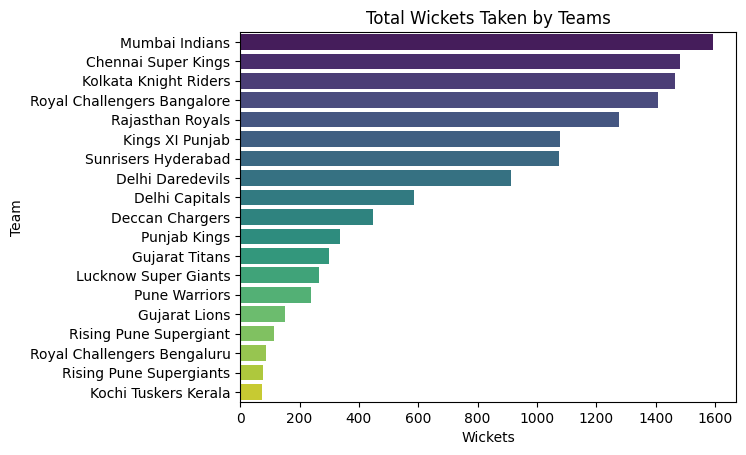

In [13]:
# 4. 🎳 Team-wise total wickets taken
team_wickets = deliveries[deliveries['is_wicket'] == 1].groupby('bowling_team').size().sort_values(ascending=False)
sns.barplot(x=team_wickets.values, y=team_wickets.index, palette='viridis')
plt.title("Total Wickets Taken by Teams")
plt.xlabel("Wickets")
plt.ylabel("Team")
plt.show()


C:\Users\DELL-7373\AppData\Local\Temp\ipykernel_11432\3757380281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Fours', 'Sixes'], y=[fours, sixes], palette='Set2')


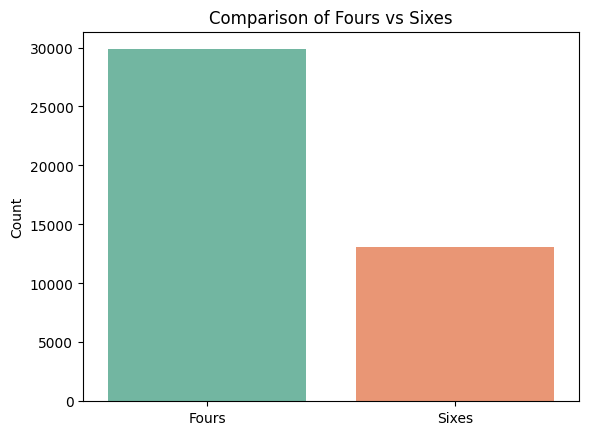

In [14]:
# 5. 💥 Boundary count (4s vs 6s)
fours = deliveries[deliveries['is_four'] == 1].shape[0]
sixes = deliveries[deliveries['is_six'] == 1].shape[0]

sns.barplot(x=['Fours', 'Sixes'], y=[fours, sixes], palette='Set2')
plt.title("Comparison of Fours vs Sixes")
plt.ylabel("Count")
plt.show()

In [15]:
matches_df = matches.merge(total_score[['match_id','total_runs']],left_on='id',right_on='match_id')

In [16]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [17]:
matches_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [18]:
teams = [ 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Chennai Super Kings',
        'Sunrisers Hyderabad',
        'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru']

In [19]:
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')

matches_df["team2"]=matches_df["team2"].str.replace("Delhi Daredevils","Delhi Capitals")
matches_df["team1"]=matches_df["team1"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches_df["team2"]=matches_df["team2"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches_df["team1"]=matches_df["team1"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
matches_df["team2"]=matches_df["team2"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")

In [20]:
matches_df = matches_df[matches_df['team1'].isin(teams)]
matches_df = matches_df[matches_df['team2'].isin(teams)]

In [21]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Deccan Chargers,...,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba,335988,142


In [22]:
matches_df.shape

(805, 22)

In [23]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')

In [24]:
matches_df = matches_df[['match_id','city','winner','total_runs']]

In [25]:
matches_df.head()

,match_id,city,winner,total_runs
0,335982,Bangalore,Kolkata Knight Riders,222
2,335984,Delhi,Delhi Daredevils,129
3,335985,Mumbai,Royal Challengers Bangalore,165
4,335986,Kolkata,Kolkata Knight Riders,110
6,335988,Hyderabad,Delhi Daredevils,142


In [26]:
deliveries_df = matches_df.merge(deliveries,on='match_id')

In [27]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,fielder,ball_number,is_dot_ball,is_boundary,is_six,is_four,over_ball,season,date,venue
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,...,NaN,1,0,0,0,0,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,...,NaN,2,1,0,0,0,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,...,NaN,3,0,0,0,0,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,...,NaN,4,1,0,0,0,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,...,NaN,5,1,0,0,0,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium


In [28]:
deliveries_df = deliveries_df[deliveries_df['inning']==2]

In [29]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,fielder,ball_number,is_dot_ball,is_boundary,is_six,is_four,over_ball,season,date,venue
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,1,0,0,0,0,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,2,0,0,0,0,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,3,1,0,0,0,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,4,0,0,0,0,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,5,0,0,0,0,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium


In [30]:
deliveries_df['total_runs_y'] = deliveries_df['total_runs_y'].astype(int)

In [31]:
deliveries_df['current_run'] = deliveries_df.groupby(['match_id'])['total_runs_y'].cumsum()

In [32]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,ball_number,is_dot_ball,is_boundary,is_six,is_four,over_ball,season,date,venue,current_run
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,0,0,0,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,2,0,0,0,0,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,3,1,0,0,0,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,4,0,0,0,0,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,5,0,0,0,0,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium,4


In [33]:
deliveries_df['runs_left'] = deliveries_df['total_runs_x'] - deliveries_df['current_run']

In [34]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_dot_ball,is_boundary,is_six,is_four,over_ball,season,date,venue,current_run,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,0,0,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium,1,221
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,0,0,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,1,0,0,0,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,0,0,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium,3,219
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,0,0,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium,4,218


In [35]:
deliveries_df['balls_left'] = 120 - (deliveries_df['over']*6 + deliveries_df['ball'])

In [36]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_boundary,is_six,is_four,over_ball,season,date,venue,current_run,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,0,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,0,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,0,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,0,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium,4,218,115


In [37]:
deliveries_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder',
       'ball_number', 'is_dot_ball', 'is_boundary', 'is_six', 'is_four',
       'over_ball', 'season', 'date', 'venue', 'current_run', 'runs_left',
       'balls_left'],
      dtype='object')

In [38]:
deliveries_df['is_wicket'].dtype

dtype('int64')

In [39]:
deliveries_df["wickets_left"]= 10 - deliveries_df.groupby(["match_id"])["is_wicket"].cumsum()

In [40]:
deliveries_df.head(100)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_six,is_four,over_ball,season,date,venue,current_run,runs_left,balls_left,wickets_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium,1,221,119,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,118,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,117,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium,3,219,116,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium,4,218,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,4,SB Joshi,...,0,0,14.4,2007/08,2008-04-18,M Chinnaswamy Stadium,79,143,32,1
220,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,5,P Kumar,...,0,0,14.5,2007/08,2008-04-18,M Chinnaswamy Stadium,80,142,31,1
221,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,6,SB Joshi,...,0,0,14.6,2007/08,2008-04-18,M Chinnaswamy Stadium,81,141,30,1
222,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,7,P Kumar,...,0,0,14.7,2007/08,2008-04-18,M Chinnaswamy Stadium,81,141,29,1


In [41]:
deliveries_df['crr'] = (deliveries_df['current_run']/(120-deliveries_df['balls_left']))*6

In [42]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_four,over_ball,season,date,venue,current_run,runs_left,balls_left,wickets_left,crr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium,1,221,119,10,6.0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,118,10,6.0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,117,10,4.0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium,3,219,116,10,4.5
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium,4,218,115,10,4.8


In [43]:
deliveries_df['rr'] = (deliveries_df['runs_left']/deliveries_df['balls_left'])*6

In [44]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,over_ball,season,date,venue,current_run,runs_left,balls_left,wickets_left,crr,rr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0.1,2007/08,2008-04-18,M Chinnaswamy Stadium,1,221,119,10,6.0,11.142857
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0.2,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,118,10,6.0,11.186441
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0.3,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,117,10,4.0,11.282051
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0.4,2007/08,2008-04-18,M Chinnaswamy Stadium,3,219,116,10,4.5,11.327586
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0.5,2007/08,2008-04-18,M Chinnaswamy Stadium,4,218,115,10,4.8,11.373913


In [45]:
def result(row):
  return 1 if row['batting_team']== row['winner'] else 0

In [46]:
deliveries_df['result'] = deliveries_df.apply(result,axis=1)

In [47]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,season,date,venue,current_run,runs_left,balls_left,wickets_left,crr,rr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,2007/08,2008-04-18,M Chinnaswamy Stadium,1,221,119,10,6.0,11.142857,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,118,10,6.0,11.186441,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,2007/08,2008-04-18,M Chinnaswamy Stadium,2,220,117,10,4.0,11.282051,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,2007/08,2008-04-18,M Chinnaswamy Stadium,3,219,116,10,4.5,11.327586,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,2007/08,2008-04-18,M Chinnaswamy Stadium,4,218,115,10,4.8,11.373913,0


In [48]:
final_df= deliveries_df[["batting_team","bowling_team","city","runs_left","balls_left","wickets_left","total_runs_x","crr","rr","result"]]

In [49]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,10,222,6.0,11.142857,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,222,6.0,11.186441,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,10,222,4.0,11.282051,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,10,222,4.5,11.327586,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,10,222,4.8,11.373913,0


In [50]:
final_df.dropna(inplace=True)


C:\Users\DELL-7373\AppData\Local\Temp\ipykernel_11432\1942946218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [51]:
final_df=final_df[final_df["balls_left"]!=0]


In [52]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,10,222,6.0,11.142857,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,222,6.0,11.186441,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,10,222,4.0,11.282051,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,10,222,4.5,11.327586,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,10,222,4.8,11.373913,0


In [53]:
batting = final_df['batting_team']
bowling = final_df['bowling_team']
city = final_df['city']

In [54]:
batting

124       Royal Challengers Bangalore
125       Royal Challengers Bangalore
126       Royal Challengers Bangalore
127       Royal Challengers Bangalore
128       Royal Challengers Bangalore
                     ...             
192237          Kolkata Knight Riders
192238          Kolkata Knight Riders
192239          Kolkata Knight Riders
192240          Kolkata Knight Riders
192241          Kolkata Knight Riders
Name: batting_team, Length: 87885, dtype: object

**Converting non numeric into numeric columns**

In [55]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [56]:
categorical_cols = final_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    encoder = LabelEncoder()
    final_df[col] = encoder.fit_transform(final_df[col])

In [57]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr,result
124,10,5,2,221,119,10,222,6.0,11.142857,0
125,10,5,2,220,118,10,222,6.0,11.186441,0
126,10,5,2,220,117,10,222,4.0,11.282051,0
127,10,5,2,219,116,10,222,4.5,11.327586,0
128,10,5,2,218,115,10,222,4.8,11.373913,0


**Scaling**

In [58]:

X = final_df.iloc[:,:-1]
y= final_df.iloc[:,-1]

In [59]:
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [60]:
import pickle
pickle.dump(scaler, open("scaler.pkl",'wb'))

In [61]:
X.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rr
124,1.050164,-0.269023,-1.474843,2.495814,1.684522,1.149667,1.714586,-0.683195,0.049441
125,1.050164,-0.269023,-1.474843,2.476173,1.654478,1.149667,1.714586,-0.683195,0.052674
126,1.050164,-0.269023,-1.474843,2.476173,1.624435,1.149667,1.714586,-1.519806,0.059766
127,1.050164,-0.269023,-1.474843,2.456532,1.594391,1.149667,1.714586,-1.310653,0.063144
128,1.050164,-0.269023,-1.474843,2.436891,1.564347,1.149667,1.714586,-1.185161,0.066581


In [62]:
batting1 = X['batting_team']
bowling1 = X['bowling_team']
city1 = X['city']

In [63]:
data = {
    '1': batting,
    '2': batting1,

}

df1 = pd.DataFrame(data)

print(df1)

                                  1         2
124     Royal Challengers Bangalore  1.050164
125     Royal Challengers Bangalore  1.050164
126     Royal Challengers Bangalore  1.050164
127     Royal Challengers Bangalore  1.050164
128     Royal Challengers Bangalore  1.050164
...                             ...       ...
192237        Kolkata Knight Riders -0.295495
192238        Kolkata Knight Riders -0.295495
192239        Kolkata Knight Riders -0.295495
192240        Kolkata Knight Riders -0.295495
192241        Kolkata Knight Riders -0.295495

[87885 rows x 2 columns]


In [64]:
df1['1'].unique()

array(['Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Chennai Super Kings', 'Deccan Chargers', 'Sunrisers Hyderabad',
       'Delhi Capitals', 'Punjab Kings', 'Gujarat Titans',
       'Lucknow Super Giants', 'Royal Challengers Bengaluru'],
      dtype=object)

In [65]:
data = {
    '1': bowling,
    '2': bowling1,

}

df2 = pd.DataFrame(data)

print(df2)

                            1         2
124     Kolkata Knight Riders -0.269023
125     Kolkata Knight Riders -0.269023
126     Kolkata Knight Riders -0.269023
127     Kolkata Knight Riders -0.269023
128     Kolkata Knight Riders -0.269023
...                       ...       ...
192237    Sunrisers Hyderabad  1.554725
192238    Sunrisers Hyderabad  1.554725
192239    Sunrisers Hyderabad  1.554725
192240    Sunrisers Hyderabad  1.554725
192241    Sunrisers Hyderabad  1.554725

[87885 rows x 2 columns]


In [66]:
data = {
    '1': city,
    '2': city1,

}

df3 = pd.DataFrame(data)

print(df3)

                1         2
124     Bangalore -1.474843
125     Bangalore -1.474843
126     Bangalore -1.474843
127     Bangalore -1.474843
128     Bangalore -1.474843
...           ...       ...
192237    Chennai -0.775839
192238    Chennai -0.775839
192239    Chennai -0.775839
192240    Chennai -0.775839
192241    Chennai -0.775839

[87885 rows x 2 columns]


In [67]:


# Convert the DataFrame to a dictionary
dictionary1 = df1.set_index('1')['2'].to_dict()

print(dictionary1)

{'Royal Challengers Bangalore': 1.0501639183034202, 'Delhi Daredevils': -0.8337590624730994, 'Kolkata Knight Riders': -0.29549535367980806, 'Mumbai Indians': 0.24276835511348324, 'Rajasthan Royals': 0.7810320639067745, 'Chennai Super Kings': -1.6411546256630363, 'Deccan Chargers': -1.3720227712663906, 'Sunrisers Hyderabad': 1.5884276270967115, 'Delhi Capitals': -1.102890916869745, 'Punjab Kings': 0.5119002095101288, 'Gujarat Titans': -0.5646272080764537, 'Lucknow Super Giants': -0.026363499283162412, 'Royal Challengers Bengaluru': 1.3192957727000658}


In [68]:
# Convert the DataFrame to a dictionary
dictionary2 = df2.set_index('1')['2'].to_dict()

print(dictionary2)

{'Kolkata Knight Riders': -0.2690228174973648, 'Rajasthan Royals': 0.7731189516107543, 'Mumbai Indians': 0.25204806705669475, 'Deccan Chargers': -1.3111645866054837, 'Chennai Super Kings': -1.5717000288825136, 'Royal Challengers Bangalore': 1.033654393887784, 'Delhi Daredevils': -0.7900937020514243, 'Sunrisers Hyderabad': 1.5547252784418435, 'Delhi Capitals': -1.0506291443284541, 'Punjab Kings': 0.5125835093337245, 'Lucknow Super Giants': -0.008487375220335028, 'Gujarat Titans': -0.5295582597743945, 'Royal Challengers Bengaluru': 1.2941898361648139}


In [69]:
# Convert the DataFrame to a dictionary
dictionary3 = df3.set_index('1')['2'].to_dict()

print(dictionary3)

{'Bangalore': -1.4748428504565294, 'Delhi': -0.5428382168256213, 'Mumbai': 0.9716693128246044, 'Kolkata': 0.6221675752130139, 'Hyderabad': 0.15616525839755982, 'Chennai': -0.7758393752333483, 'Jaipur': 0.2726658376014233, 'Cape Town': -1.1253411128449389, 'Port Elizabeth': 1.321171050436195, 'Durban': -0.19333647921403074, 'Centurion': -1.0088405336410753, 'East London': -0.07683590001016721, 'Johannesburg': 0.38916641680528685, 'Kimberley': 0.5056669960091503, 'Bloemfontein': -1.2418416920488025, 'Ahmedabad': -1.591343429660393, 'Cuttack': -0.6593387960294848, 'Nagpur': 1.088169892028468, 'Visakhapatnam': 1.9036739464555124, 'Pune': 1.4376716296400585, 'Raipur': 1.554172208843922, 'Ranchi': 1.6706727880477856, 'Abu Dhabi': -1.7078440088642566, 'Bengaluru': -1.3583422712526658, 'Dubai': -0.3098370584178943, 'Sharjah': 1.787173367251649, 'Navi Mumbai': 1.2046704712323315, 'Chandigarh': -0.8923399544372118, 'Lucknow': 0.7386681544168774, 'Guwahati': 0.0396646791936963, 'Dharamsala': -0.4

In [70]:
y.head()

124    0
125    0
126    0
127    0
128    0
Name: result, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [73]:
X_train.shape

(70308, 9)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model = Sequential()

# Input layer and one hidden layer
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # 16 neurons in hidden layer

# Another hidden layer (optional)
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))


c:\Users\DELL-7373\Desktop\internship\AI_engineer_intern_tasks\task1\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.7652 - loss: 0.4680 - val_accuracy: 0.7988 - val_loss: 0.4144
Epoch 2/20
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8068 - loss: 0.4059 - val_accuracy: 0.8104 - val_loss: 0.3962
Epoch 3/20
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8159 - loss: 0.3885 - val_accuracy: 0.8132 - val_loss: 0.3851
Epoch 4/20
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8200 - loss: 0.3773 - val_accuracy: 0.8245 - val_loss: 0.3736
Epoch 5/20
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8289 - loss: 0.3662 - val_accuracy: 0.8301 - val_loss: 0.3590
Epoch 6/20
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.8342 - loss: 0.3536 - val_accuracy: 0.8356 - val_loss: 0.3514
Epoch 7/20
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.8393 - loss: 0.3453 - val_accuracy: 0.8394 - val_loss: 0.3436
Epoch 8/20
7031/7031 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.8421 - loss: 0

In [79]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8607 - loss: 0.3081
Test Accuracy: 85.92%


In [80]:
import matplotlib.pyplot as plt

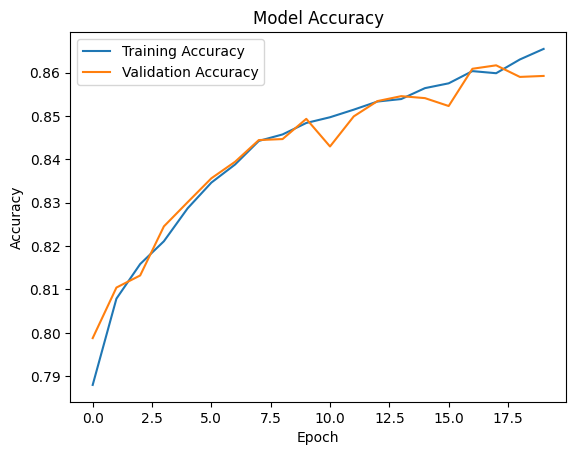

In [81]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [82]:
# Save the model
model.save('ipl_winner_model.h5')

In [83]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import pickle

def predict_winner(batting_team, bowling_team, city, runs_left, balls_left, wickets_left, total_runs, current_run_rate, required_run_rate):
    # Load the model and scaler
    model = load_model('ipl_winner_model.h5')
    scaler = pickle.load(open("scaler.pkl", 'rb'))
    
    # Create a DataFrame with the input data
    input_df = pd.DataFrame({
        'batting_team': [batting_team],
        'bowling_team': [bowling_team],
        'city': [city],
        'runs_left': [runs_left],
        'balls_left': [balls_left],
        'wickets_left': [wickets_left],
        'total_runs_x': [total_runs],
        'crr': [current_run_rate],
        'rr': [required_run_rate]
    })
    
    # Encode categorical variables using the dictionaries from training
    input_df['batting_team'] = input_df['batting_team'].map(dictionary1)
    input_df['bowling_team'] = input_df['bowling_team'].map(dictionary2)
    input_df['city'] = input_df['city'].map(dictionary3)
    
    # Scale numerical features
    numerical_cols = input_df.select_dtypes(include=['float64', 'int64']).columns
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    
    # Make prediction
    prediction = model.predict(input_df)[0][0]
    
    # Return probability of batting team winning
    return prediction

In [97]:
# Example scenario: CSK batting against MI
batting_team = "Royal Challengers Bengaluru"
bowling_team = "Mumbai Indians"
city = "Mumbai"
runs_left = 10
balls_left = 30
wickets_left = 6
total_runs = 130
current_run_rate = 10.0
required_run_rate = 10.0

win_probability = predict_winner(
    batting_team, bowling_team, city, 
    runs_left, balls_left, wickets_left, 
    total_runs, current_run_rate, required_run_rate
)

print(f"Probability of {batting_team} winning: {win_probability:.2%}")
if win_probability > 0.5:
    print(f"{batting_team} is predicted to win!")
else:
    print(f"{bowling_team} is predicted to win!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Probability of Royal Challengers Bengaluru winning: 63.47%
Royal Challengers Bengaluru is predicted to win!
